# NAME :** SAHITHYA KOLLIPARA**

PROJECT NAME : **Loan Prediction using Machine Learning**

**PROJECT IDEA** –

The idea behind this ML project is to build a model that will classify how much loan the user can take. It is based on the user’s marital status, education, number of dependents, and employments.
You can build a linear model for this project.

Dataset: http://lib.stat.cmu.edu/datasets/boston



# Importing Necessary Libraries & Taking Care of Warnings

In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Importing the Dataset

In [6]:
boston = load_boston()
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Analysing the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Checking the missing values

In [13]:
df.isnull().sum() 
#Before importing the dataset, I have sanitized the dataset.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# Implementing Seaborn plots

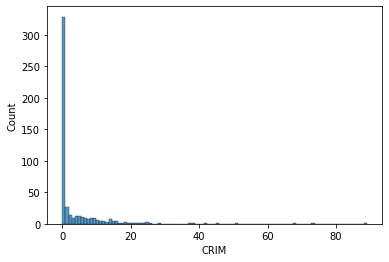

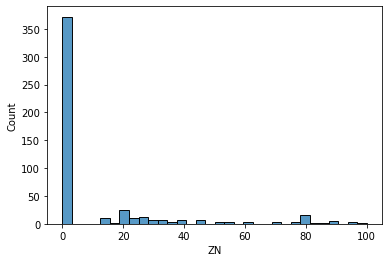

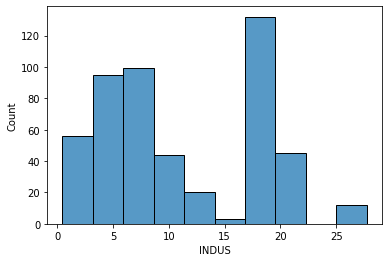

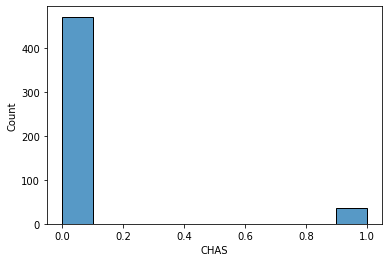

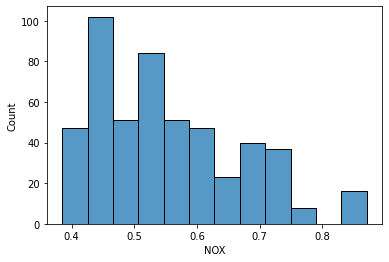

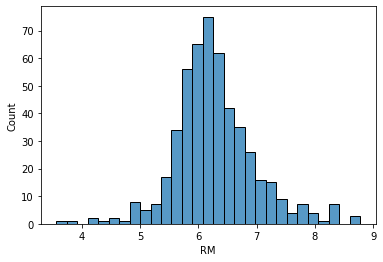

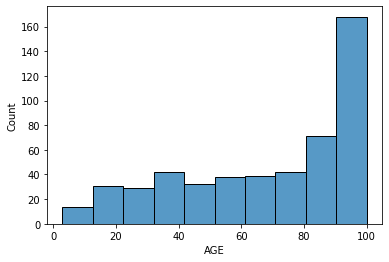

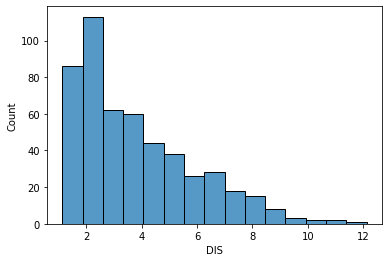

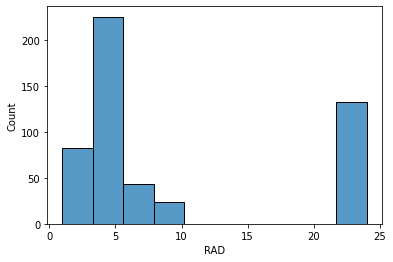

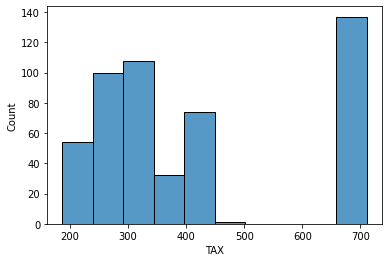

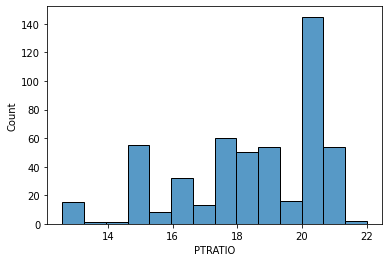

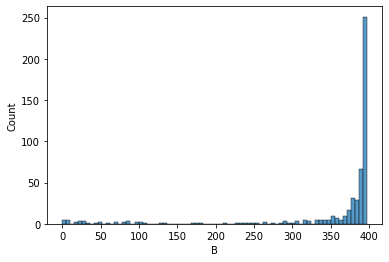

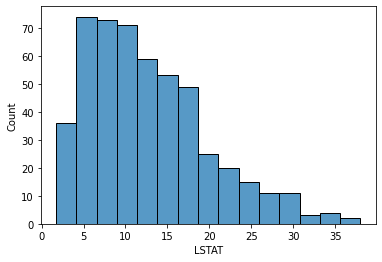

In [14]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sb.histplot(df[col])

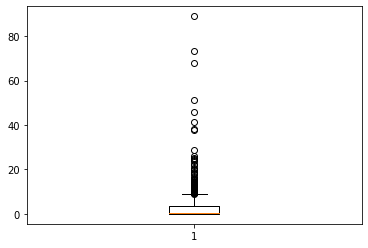

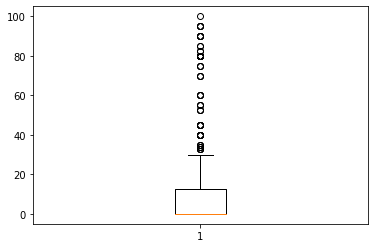

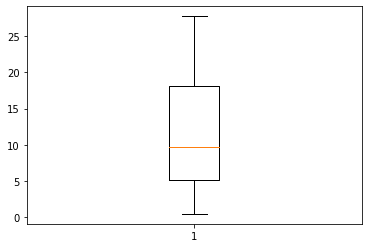

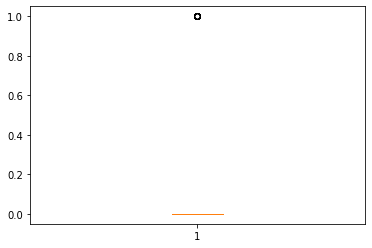

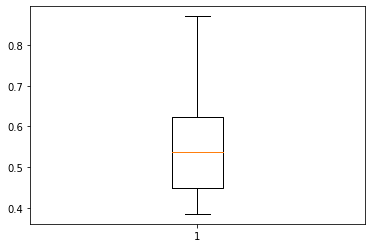

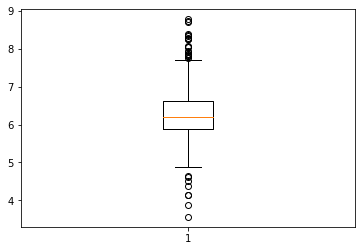

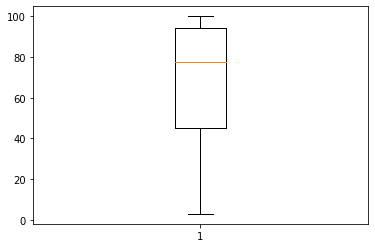

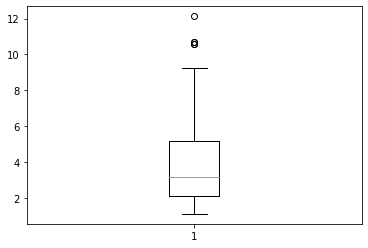

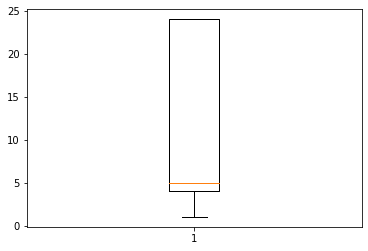

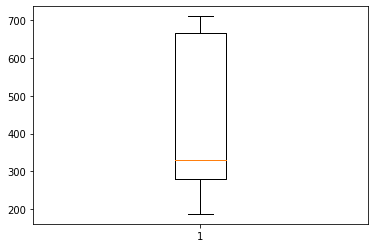

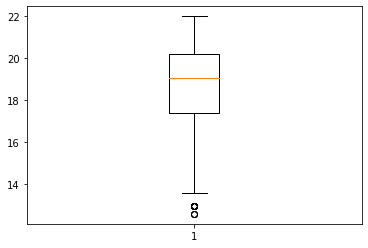

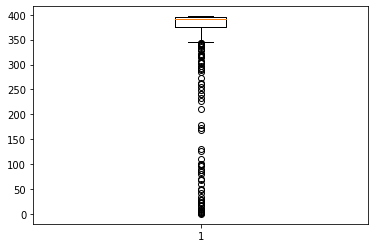

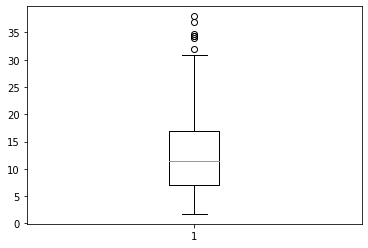

In [15]:
#for the outliers
for i, col in enumerate(df.columns):
    plt.figure(i)
    plt.boxplot(df[col])

In [16]:
col = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
for i in col:
        df[i] = np.log(df[i].values+1)

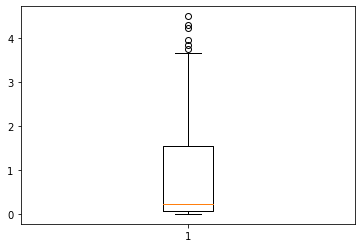

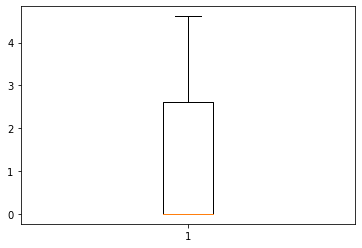

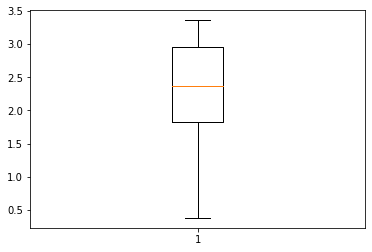

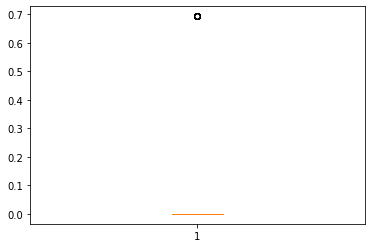

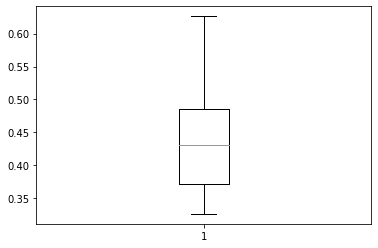

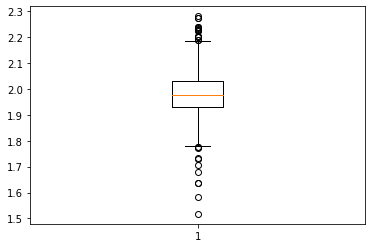

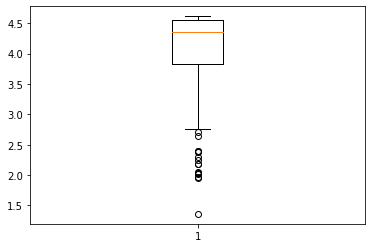

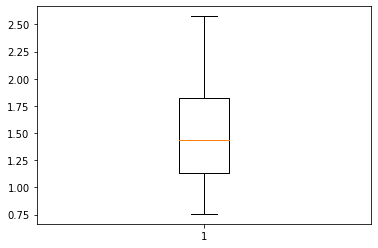

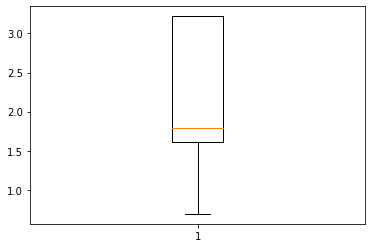

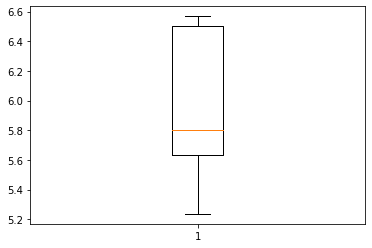

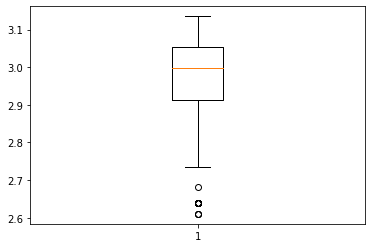

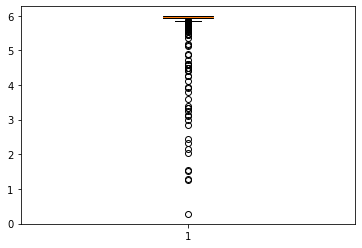

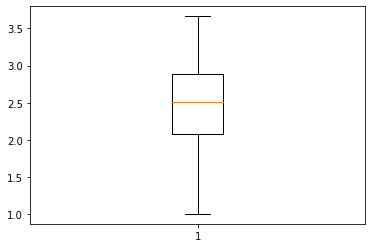

In [17]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    plt.boxplot(df[col])

In [18]:
df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
496,0.254332,0.0,2.369309,0.0,0.460584,1.854734,4.302713,1.334633,1.945910,5.971262,3.005683,5.986201,3.097386
497,0.237740,0.0,2.369309,0.0,0.460584,1.916040,4.271095,1.359103,1.945910,5.971262,3.005683,5.986201,2.714695
498,0.214401,0.0,2.369309,0.0,0.460584,1.948621,4.194190,1.226448,1.945910,5.971262,3.005683,5.986201,2.633327
499,0.163674,0.0,2.369309,0.0,0.460584,1.882362,4.310799,1.223746,1.945910,5.971262,3.005683,5.983357,2.778819
500,0.202435,0.0,2.369309,0.0,0.460584,1.949760,4.390739,1.252249,1.945910,5.971262,3.005683,5.986201,2.729812
501,0.060747,0.0,2.559550,0.0,0.452985,2.027227,4.249923,1.246630,0.693147,5.613128,3.091042,5.973784,2.367436
502,0.044275,0.0,2.559550,0.0,0.452985,1.962908,4.352855,1.190127,0.693147,5.613128,3.091042,5.986201,2.310553
503,0.058986,0.0,2.559550,0.0,0.452985,2.076437,4.521789,1.152943,0.693147,5.613128,3.091042,5.986201,1.893112
504,0.103991,0.0,2.559550,0.0,0.452985,2.053354,4.503137,1.220505,0.693147,5.613128,3.091042,5.977492,2.012233
505,0.046320,0.0,2.559550,0.0,0.452985,1.950187,4.404277,1.254191,0.693147,5.613128,3.091042,5.986201,2.183802


## Splitting the dataset into x and y

In [19]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Splitting the dataset into training & testing sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [21]:
(X_test).shape

(127, 12)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear = LinearRegression()
linear.fit(X_train,Y_train)
pred_train = linear.predict(X_train)
pred_test = linear.predict(X_test)

print(np.sqrt(mean_squared_error(Y_train, pred_train)))
print(np.sqrt(mean_squared_error(Y_test, pred_test)))


0.3095602526750845
0.29207471829887


# Model Evaluation

In [23]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_test)

0.6851878480435989

In [24]:
linear.score(X_test, Y_test)

0.6851878480435989

# Data Visualization

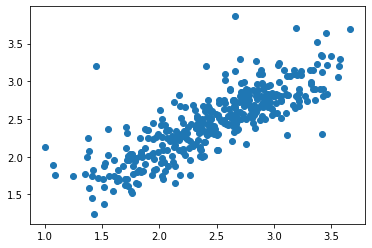

In [25]:
plt.scatter(Y_train, pred_train);

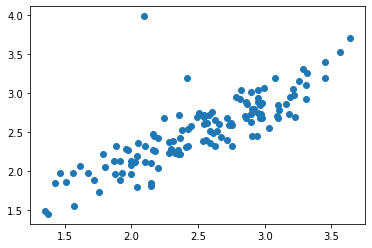

In [26]:
plt.scatter(Y_test, pred_test);

In [27]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, Y_train)
pred_train = regressor.predict(X_train)
pred_test = regressor.predict(X_test)

print(np.sqrt(mean_squared_error(Y_train, pred_train)))
print(np.sqrt(mean_squared_error(Y_test, pred_test)))
print('R-square value:', r2_score(Y_test, pred_test))

0.1012926085263667
0.23276961781393657
R-square value: 0.8000524246290791


In [28]:
#checking accuracy ultimately
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from numpy import mean
from numpy import std

cv = KFold(n_splits = 10, random_state = 1, shuffle = True)
scores = cross_val_score(regressor, X_train, Y_train, cv = cv)

print('Accuracy: %.2f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.75 (0.112)


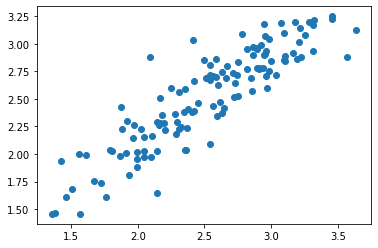

In [29]:
plt.scatter(Y_test, pred_test);

# Results:
Accuarcy of the model is 84%
# We have used Random Forest Regressor